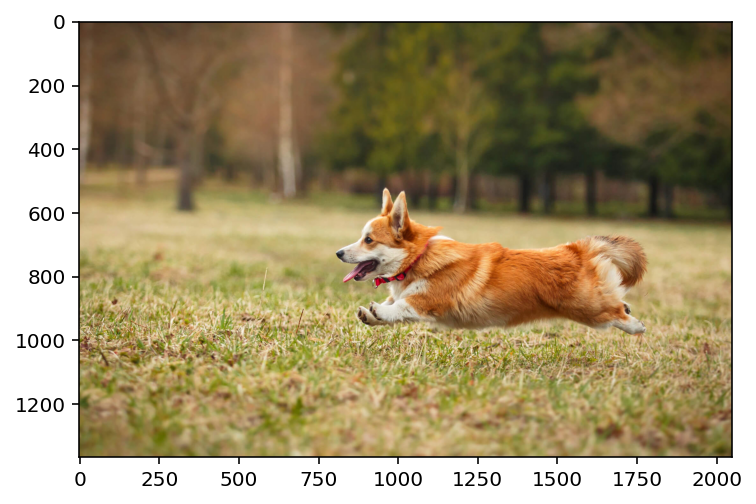

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

img = plt.imread('dog.jpg')
plt.imshow(img)

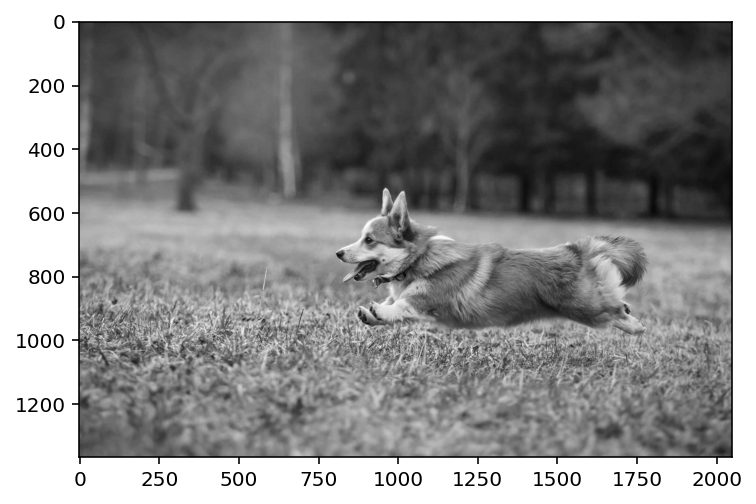

In [3]:
# Convert to grayscale
img = img.mean(axis=2)
plt.imshow(img, cmap='gray')

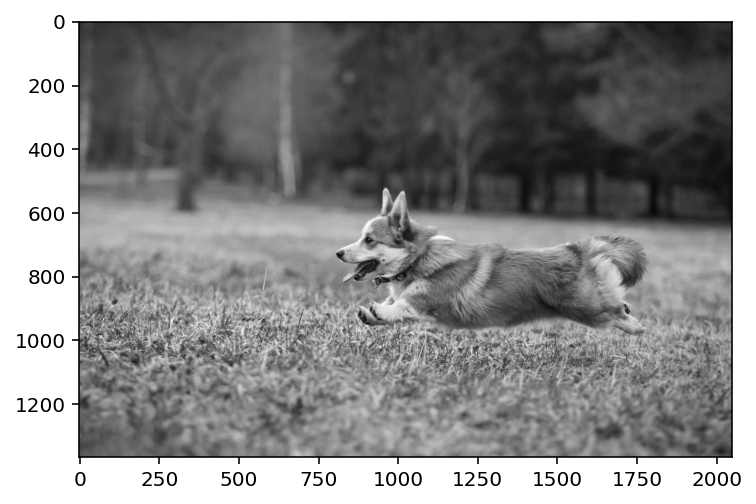

In [4]:
img = img/255
plt.imshow(img, cmap='gray')

In [17]:
# MF code with missing values
import torch
import torch.nn as nn
import torch.nn.functional as F

# INIT WELL!

def factorize(A, k, niter=100, lr=1e-3):
    n, m = A.shape
    # If we do not init well, our solution is poor
    W = torch.abs(torch.randn(n, k)/10).to(A.device)
    H = torch.abs(torch.randn(k, m)/10).to(A.device)
    W.requires_grad = True
    H.requires_grad = True

    # Mask where A is not missing
    mask = ~torch.isnan(A).to(A.device)
    print(mask.shape)

    optimizer = torch.optim.Adam([W, H], lr=lr)
    for i in range(niter):
        optimizer.zero_grad()
        Ahat = W @ H
        loss = F.mse_loss(Ahat[mask], A[mask])
        loss.backward()
        optimizer.step()
        if i % 50 == 0:
            print(i, loss.item())
    return W, H


In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [8]:
A = torch.from_numpy(img).float().to(device)
W, H = factorize(A, 40, niter=500, lr=1e-2)

torch.Size([1365, 2048])
0 0.06829886883497238
10 0.01749359630048275
20 0.013666706159710884
30 0.012201043777167797
40 0.011160558089613914
50 0.009914325550198555
60 0.008142316713929176
70 0.0068585933186113834
80 0.005886096972972155
90 0.005254762712866068
100 0.004644310101866722
110 0.004189325962215662
120 0.003762295236811042
130 0.003400223096832633
140 0.0030894046649336815
150 0.0028140596114099026
160 0.002575189108029008
170 0.002369344001635909
180 0.002189089311286807
190 0.0020303716883063316
200 0.001891914987936616
210 0.0017732753185555339
220 0.0016737726982682943
230 0.001591882319189608
240 0.0015251439763233066
250 0.0014707562513649464
260 0.0014264964265748858
270 0.0013910450506955385
280 0.0013630962930619717
290 0.0013412574771791697
300 0.0013241033302620053
310 0.0013104281388223171
320 0.0012993116397410631
330 0.0012900681467726827
340 0.0012822631979361176
350 0.0012755474308505654
360 0.0012697557685896754
370 0.0012646956602111459
380 0.001260279328

In [9]:
W@H

tensor([[0.2114, 0.2170, 0.2225,  ..., 0.2079, 0.2116, 0.2141],
        [0.2113, 0.2168, 0.2222,  ..., 0.2076, 0.2112, 0.2136],
        [0.2117, 0.2171, 0.2225,  ..., 0.2066, 0.2102, 0.2125],
        ...,
        [0.3229, 0.3245, 0.3225,  ..., 0.3303, 0.3296, 0.3284],
        [0.3192, 0.3211, 0.3199,  ..., 0.3376, 0.3367, 0.3354],
        [0.3166, 0.3189, 0.3183,  ..., 0.3432, 0.3421, 0.3407]],
       device='cuda:0', grad_fn=<MmBackward0>)

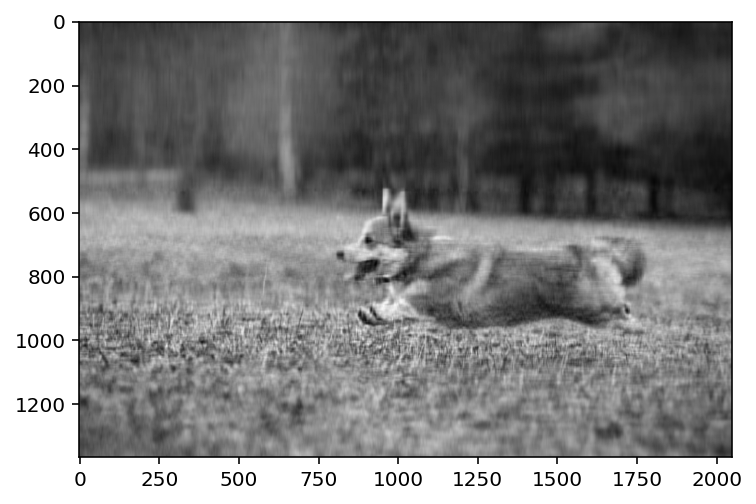

In [11]:
# Plot reconstructed image
plt.imshow((W @ H).cpu().detach().numpy(), cmap='gray')

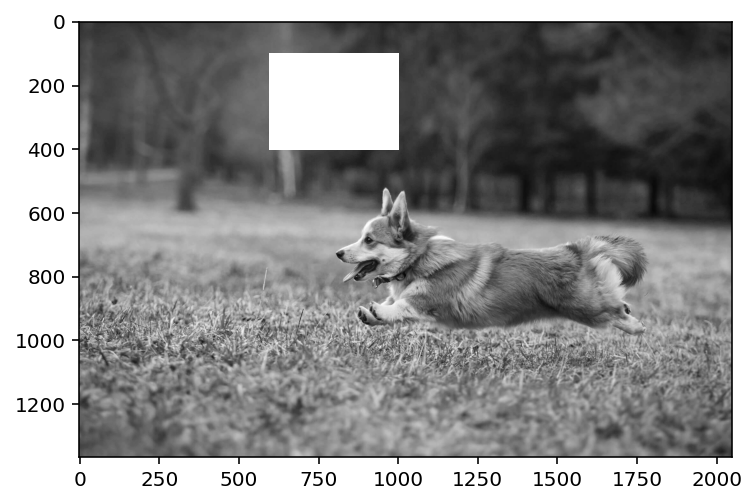

In [12]:
# Now, remove a rectangular patch from the image

patch = [100, 600, 400, 1000]
img_copy = img.copy()

# NAN the patch region
img_copy[patch[0]:patch[2], patch[1]: patch[3]] = np.NaN
plt.imshow(img_copy,cmap='gray')

In [13]:
A = torch.from_numpy(img_copy).float().to(device)
W, H = factorize(A, 40, niter=500, lr=1e-2)

torch.Size([1365, 2048])
0 0.07003924995660782
10 0.01769193261861801
20 0.013949600048363209
30 0.01242945995181799
40 0.01138114370405674
50 0.010110059753060341
60 0.008373978547751904
70 0.007100649643689394
80 0.006054402329027653
90 0.00539542268961668
100 0.004787002224475145
110 0.004339388106018305
120 0.0039057331159710884
130 0.003520655445754528
140 0.0031704953871667385
150 0.0028561835642904043
160 0.0025887591764330864
170 0.0023648005444556475
180 0.002177545567974448
190 0.00201977975666523
200 0.0018848013132810593
210 0.0017688344232738018
220 0.001670596655458212
230 0.00158921058755368
240 0.0015228266129270196
250 0.0014693135162815452
260 0.0014267893275246024
270 0.0013936090981587768
280 0.0013681232230737805
290 0.0013486901298165321
300 0.0013338333228603005
310 0.00132232834585011
320 0.0013131353771314025
330 0.0013056261232122779
340 0.001299339928664267
350 0.0012939369771629572
360 0.0012892503291368484
370 0.0012851168867200613
380 0.0012814163928851485

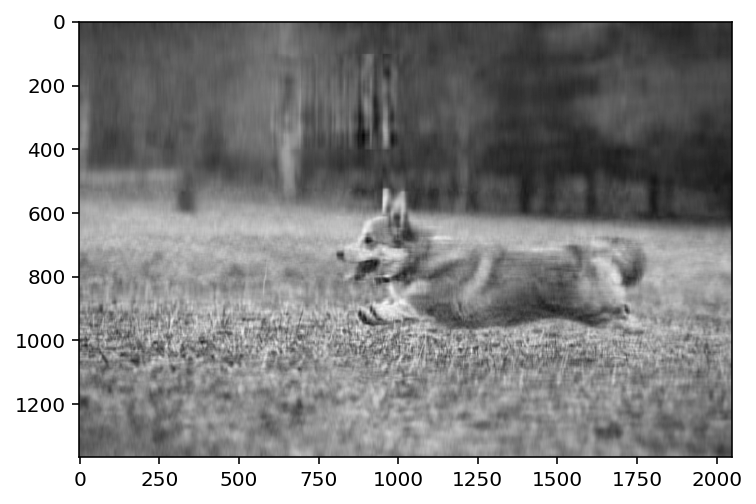

In [14]:
plt.imshow((W@H).cpu().detach().numpy(), cmap='gray')

In [25]:
A = torch.from_numpy(img_copy).float().to(device)
W, H = factorize(A, 2000, niter=10000, lr=1e-2)

torch.Size([1365, 2048])
0 150.97117614746094
50 0.05341056361794472
100 0.03285151720046997
150 0.02901613898575306
200 0.025218751281499863
250 0.02143346145749092
300 0.017777008935809135
350 0.014495181851089
400 0.01180704589933157
450 0.009690864011645317
500 0.008009172044694424
550 0.006648130714893341
600 0.005532505922019482
650 0.004613785073161125
700 0.0038573681376874447
750 0.003235312644392252
800 0.002723895013332367
850 0.002303040586411953
900 0.001956029562279582
950 0.0016691131750121713
1000 0.0014310750411823392
1050 0.0012328173033893108
1100 0.001066986471414566
1150 0.0009276540949940681
1200 0.0008100455161184072
1250 0.0007103134994395077
1300 0.0006253537721931934
1350 0.0005526544991880655
1400 0.0004901768988929689
1450 0.0004362595791462809
1500 0.00038954304181970656
1550 0.00034891001996584237
1600 0.0003134383005090058
1650 0.0002823633549269289
1700 0.0002550485369283706
1750 0.00023096162476576865
1800 0.00020965580188203603
1850 0.00019075443560723

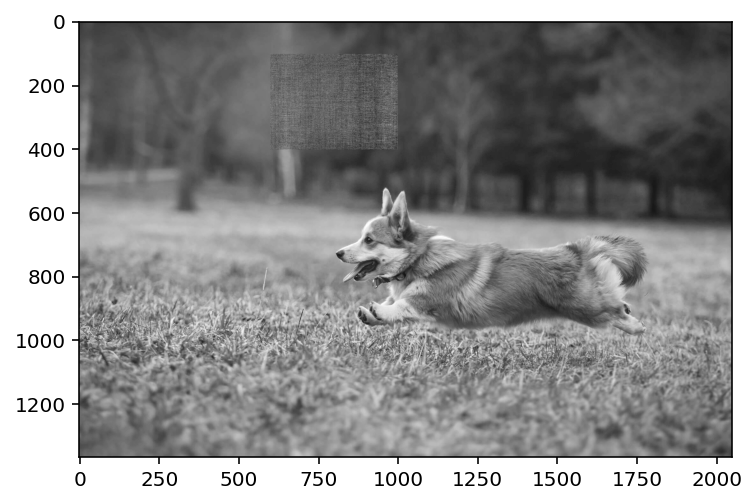

In [26]:
plt.imshow((W@H).cpu().detach().numpy(), cmap='gray')

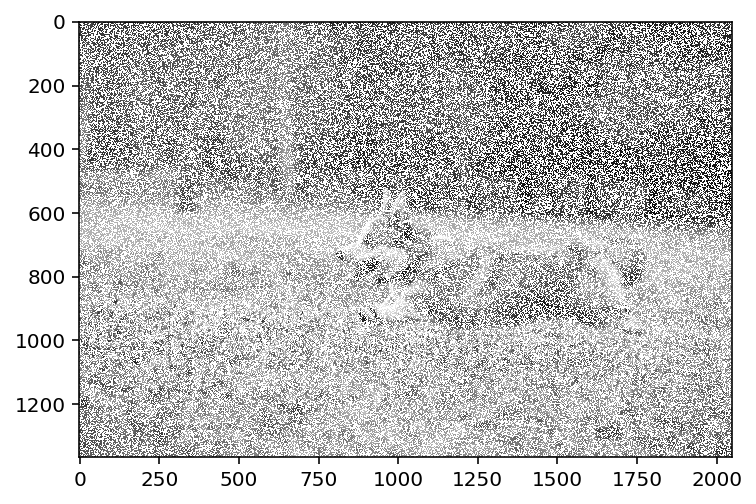

In [70]:
import numpy.ma as ma

img_copy_mar = img.copy()
# Mask 50% of the values
mask = np.random.rand(*img_copy_mar.shape) < 0.5
img_copy_mar[mask] = np.NaN

plt.imshow(img_copy_mar, cmap='gray', interpolation='none')


In [71]:
A = torch.from_numpy(img_copy_mar).float().to(device)
W, H = factorize(A, 40, niter=500, lr=1e-2)

torch.Size([1365, 2048])
0 0.06834408640861511
50 0.009696380235254765
100 0.004485020879656076
150 0.002751269144937396
200 0.001827028812840581
250 0.0014045980060473084
300 0.0012345635332167149
350 0.001172593212686479
400 0.0011480636894702911
450 0.001136348000727594


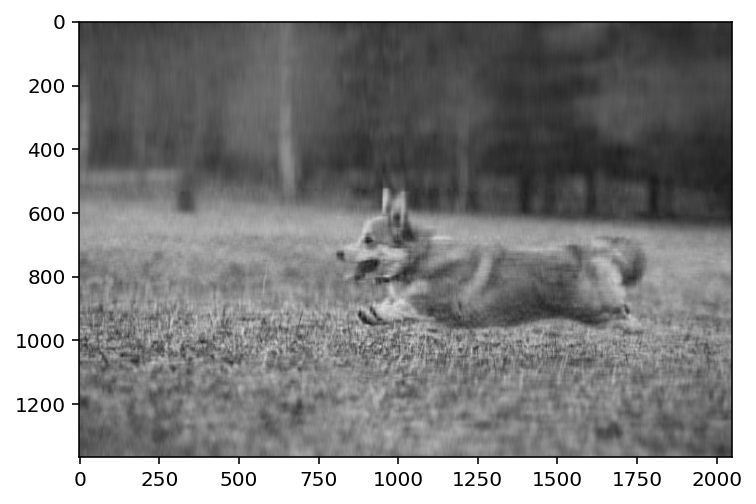

In [72]:
plt.imshow((W@H).cpu().detach().numpy(), cmap='gray')

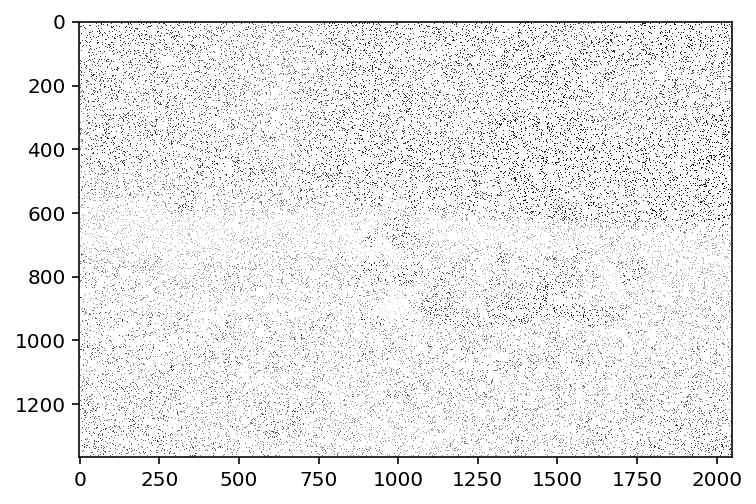

In [88]:
img_copy_mar = img.copy()
# Mask 95% of the values
mask = np.random.rand(*img_copy_mar.shape) < 0.90
img_copy_mar[mask] = np.NaN

plt.imshow(img_copy_mar, cmap='gray', interpolation='none')


In [97]:
A = torch.from_numpy(img_copy_mar).float().to(device)
W, H = factorize(A, 12, niter=5000, lr=1e-2)


torch.Size([1365, 2048])
0 0.16524310410022736
50 0.011408291757106781
100 0.010492468252778053
150 0.007313533686101437
200 0.005183914676308632
250 0.00427259411662817
300 0.003722510999068618
350 0.0034131277352571487
400 0.003222056897357106
450 0.0030949581414461136
500 0.0030100212898105383
550 0.00295196077786386
600 0.00291002937592566
650 0.002877690363675356
700 0.002851426601409912
750 0.0028294965159147978
800 0.0028110460843890905
850 0.0027956736739724874
900 0.002783292206004262
950 0.002773684449493885
1000 0.0027662254869937897
1050 0.0027602335903793573
1100 0.002755254739895463
1150 0.002751055173575878
1200 0.002747524296864867
1250 0.0027445885352790356
1300 0.002742170123383403
1350 0.0027401773259043694
1400 0.0027385170105844736
1450 0.002737109549343586
1500 0.002735892776399851
1550 0.0027348219882696867
1600 0.0027338655199855566
1650 0.0027330005541443825
1700 0.002732211723923683
1750 0.0027314850594848394
1800 0.002730810549110174
1850 0.002730181673541665

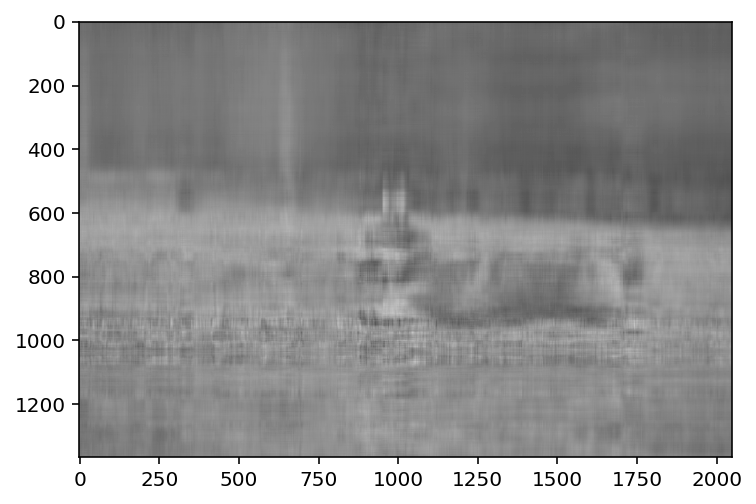

In [98]:
plt.imshow((W@H).cpu().detach().numpy(), cmap='gray')